In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from statsmodels.graphics.mosaicplot import mosaic

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# This command installs all the necessary Python libraries for the analysis
!pip install pandas numpy scikit-learn matplotlib seaborn statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 2.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.6 MB 2.4 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.6 MB 2.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.6 MB 2.4 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.6 MB 1.5 MB/s eta 0:00:05
   --------------- ------------------------ 3.7/9.6 MB 1.6 MB/s eta 0:00:04
   ----------------- ------------

In [6]:
# Load the dataset from the CSV file
try:
    mcdonalds = pd.read_csv('mcdonalds.csv')
    print("--- First 3 Rows of the Dataset ---")
    display(mcdonalds.head(3))
    
    # Convert the first 11 columns to a numeric format (1 for 'Yes', 0 for 'No')
    md_x = mcdonalds.iloc[:, 0:11].replace({'Yes': 1, 'No': 0})

    # Display the average for each attribute, giving a first look at consumer perceptions
    print("\n--- Average Perception Across All Consumers (as percentages) ---")
    display((md_x.mean() * 100).round(2))

except FileNotFoundError:
    print("Error: 'mcdonalds.csv' not found. Please make sure the file is in the same directory as your notebook.")

--- First 3 Rows of the Dataset ---


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female



--- Average Perception Across All Consumers (as percentages) ---


C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_3940\1255060926.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  md_x = mcdonalds.iloc[:, 0:11].replace({'Yes': 1, 'No': 0})


yummy         55.26
convenient    90.78
spicy          9.36
fattening     86.72
greasy        52.65
fast          90.02
cheap         59.88
tasty         64.42
expensive     35.79
healthy       19.89
disgusting    24.29
dtype: float64

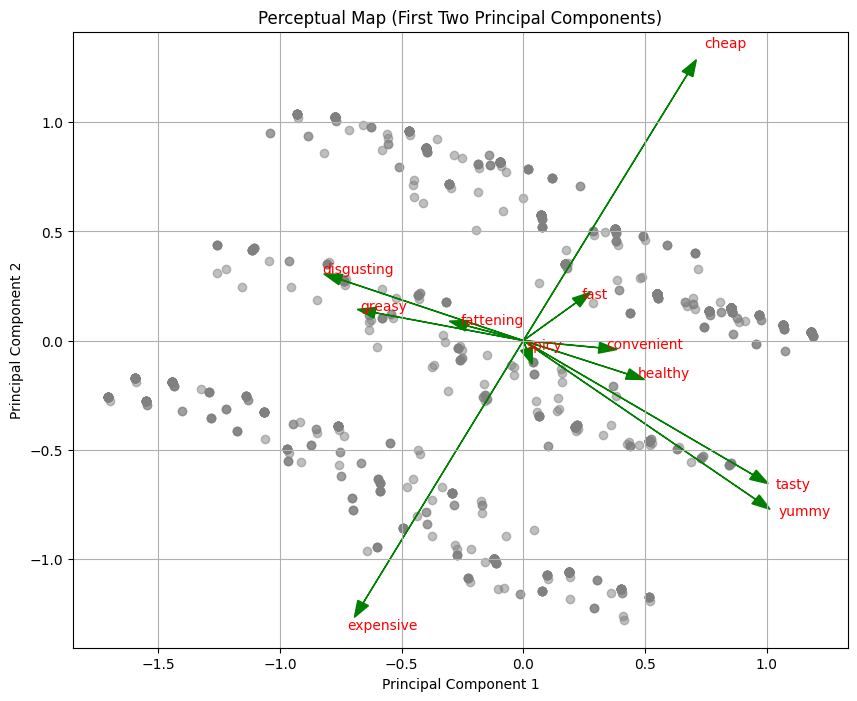

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on the numeric attribute data
pca = PCA()
md_pca = pca.fit_transform(md_x)

# Create the perceptual map
plt.figure(figsize=(10, 8))
plt.scatter(md_pca[:, 0], md_pca[:, 1], c='grey', alpha=0.5)
plt.title('Perceptual Map (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Overlay attribute vectors (loadings) to see how they contribute to the PCs
loadings = pca.components_
for i, var in enumerate(md_x.columns):
    plt.arrow(0, 0, loadings[0, i]*2, loadings[1, i]*2, 
              color='green', head_width=0.05)
    plt.text(loadings[0, i]*2.2, loadings[1, i]*2.2, var, color='r')

plt.grid(True)
plt.show()

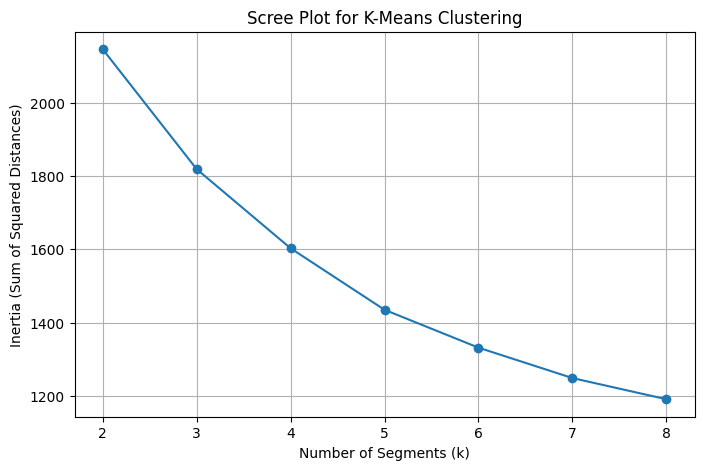

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for a range of k values
inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(md_x)
    inertia.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertia, marker='o')
plt.title('Scree Plot for K-Means Clustering')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [17]:
from sklearn.cluster import KMeans

# Run K-Means with k=4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(md_x)

# Add the segment labels to the main dataframe
mcdonalds['Segment'] = kmeans.labels_

print("K-Means clustering complete. Segment labels added to the DataFrame.")
print("\nSegment sizes:")
# Display the number of consumers in each segment
print(mcdonalds['Segment'].value_counts().sort_index())

K-Means clustering complete. Segment labels added to the DataFrame.

Segment sizes:
Segment
0    364
1    240
2    533
3    316
Name: count, dtype: int64


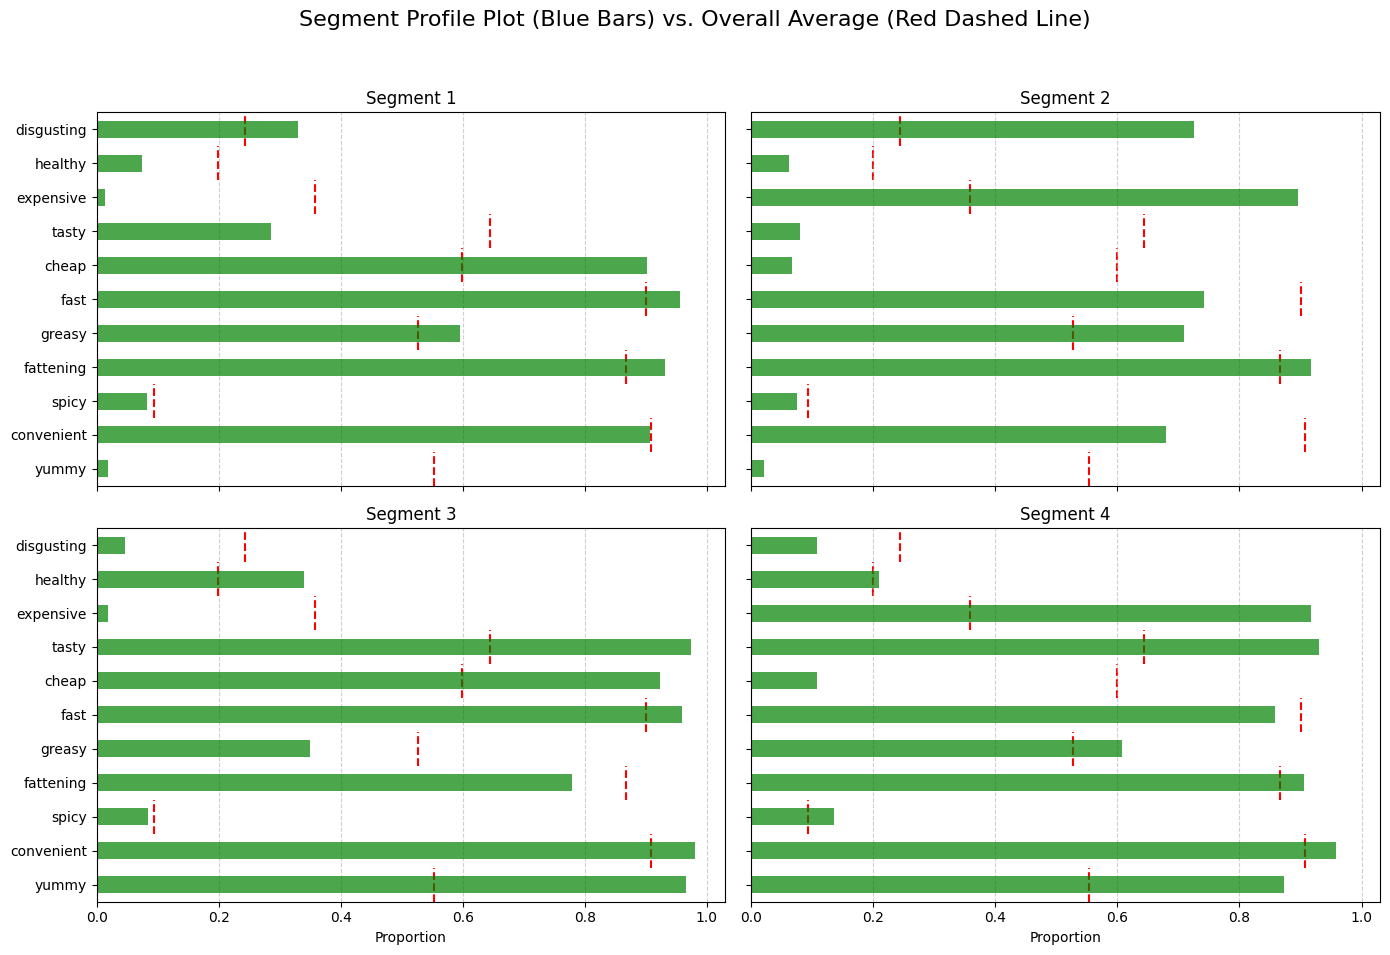

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Create Segment Profile Plot ---
# Calculate the center (mean perception) for each segment
segment_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=md_x.columns)
# Calculate the overall mean perception across all consumers
overall_mean = md_x.mean()

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten() # Flatten the 2x2 array to easily loop through it

for i in range(4):
    ax = axes[i]
    # Plot segment centroid as horizontal bars
    segment_centroids.iloc[i].plot(kind='barh', ax=ax, color='green', alpha=0.7, zorder=2)
    # Plot overall mean as vertical dashed lines for comparison
    for j, val in enumerate(overall_mean):
        ax.plot([val, val], [j-0.5, j+0.5], 'r--', zorder=1)
    
    ax.set_title(f'Segment {i+1}') # Use Segment 1, 2, 3, 4 for clarity
    ax.set_xlabel('Proportion')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.suptitle('Segment Profile Plot (Blue Bars) vs. Overall Average (Red Dashed Line)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 1000x800 with 0 Axes>

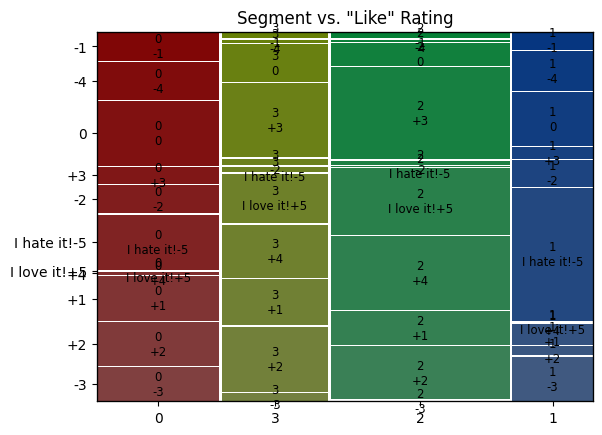

In [25]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Create the mosaic plot
plt.figure(figsize=(10, 8))
mosaic(mcdonalds, ['Segment', 'Like'], title='Segment vs. "Like" Rating')
plt.show()

<Figure size 800x600 with 0 Axes>

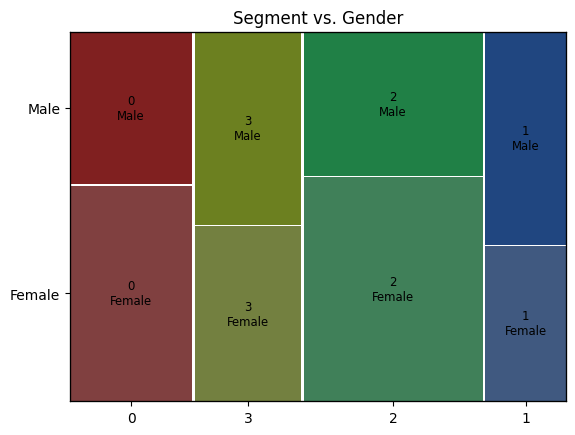

In [26]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Create the mosaic plot for Gender vs. Segment
plt.figure(figsize=(8, 6))
mosaic(mcdonalds, ['Segment', 'Gender'], title='Segment vs. Gender')
plt.show()

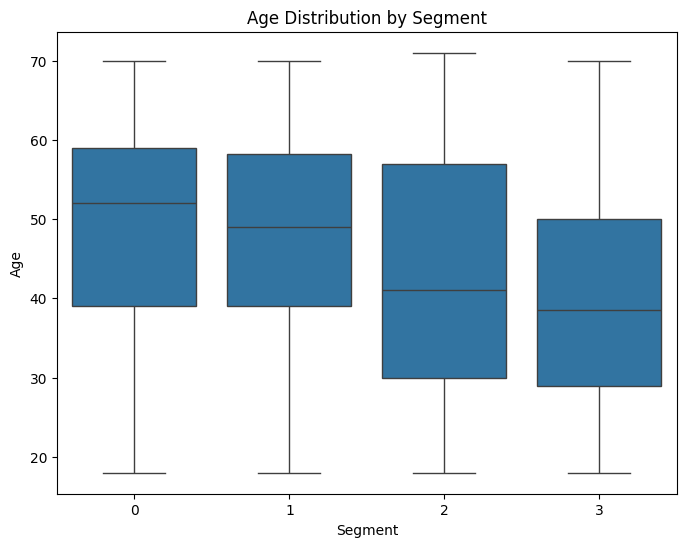

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for Age vs. Segment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Age', data=mcdonalds)
plt.title('Age Distribution by Segment')
plt.show()

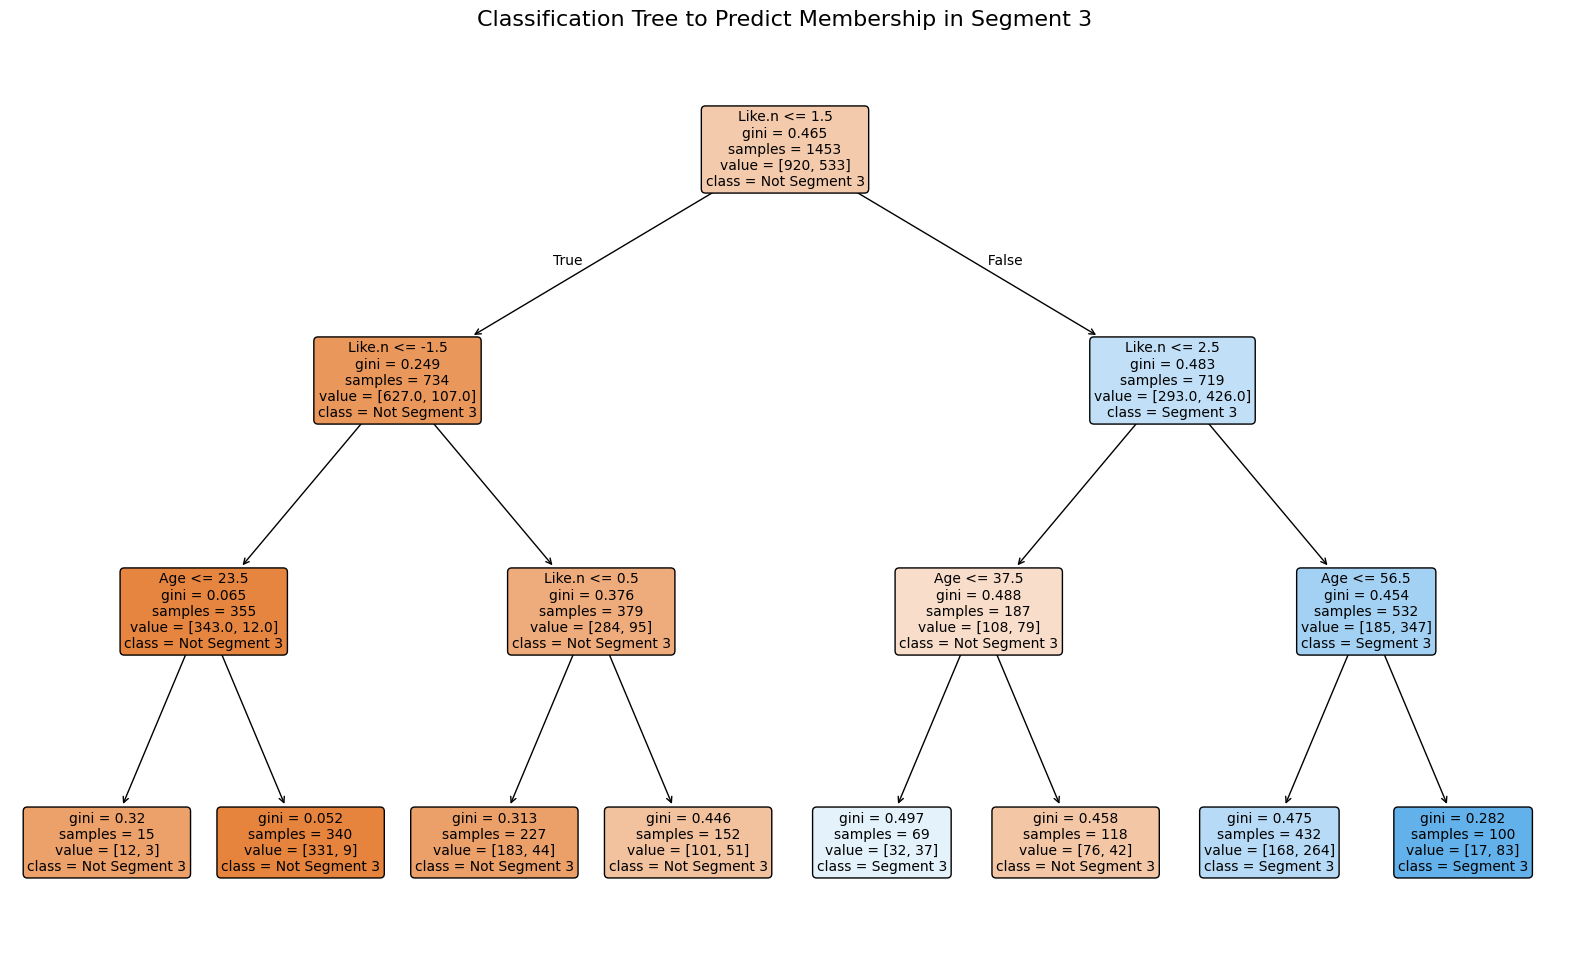

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# --- FIX: Robustly clean and convert the descriptor variables ---

# Clean the 'Like' column by simply removing the text portions
like_cleaned = mcdonalds['Like'].str.replace('I hate it!', '').str.replace('I love it!', '').str.replace('!', '')
mcdonalds['Like.n'] = pd.to_numeric(like_cleaned)

# Convert other categorical columns to numeric codes
mcdonalds['VisitFrequency.n'] = mcdonalds['VisitFrequency'].astype('category').cat.codes
mcdonalds['Gender.n'] = mcdonalds['Gender'].astype('category').cat.codes

# --- The rest of the model building is the same ---

# Define the features (X) and the target (y)
X = mcdonalds[['Like.n', 'Age', 'VisitFrequency.n', 'Gender.n']]
y = (mcdonalds['Segment'] == 2) # Segment 3 has the cluster label '2'

# Fit the decision tree model
tree = DecisionTreeClassifier(max_depth=3, random_state=1234)
tree.fit(X, y)

# Plot the tree to visualize the decision rules
plt.figure(figsize=(20, 12))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['Not Segment 3', 'Segment 3'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Classification Tree to Predict Membership in Segment 3', fontsize=16)
plt.show()

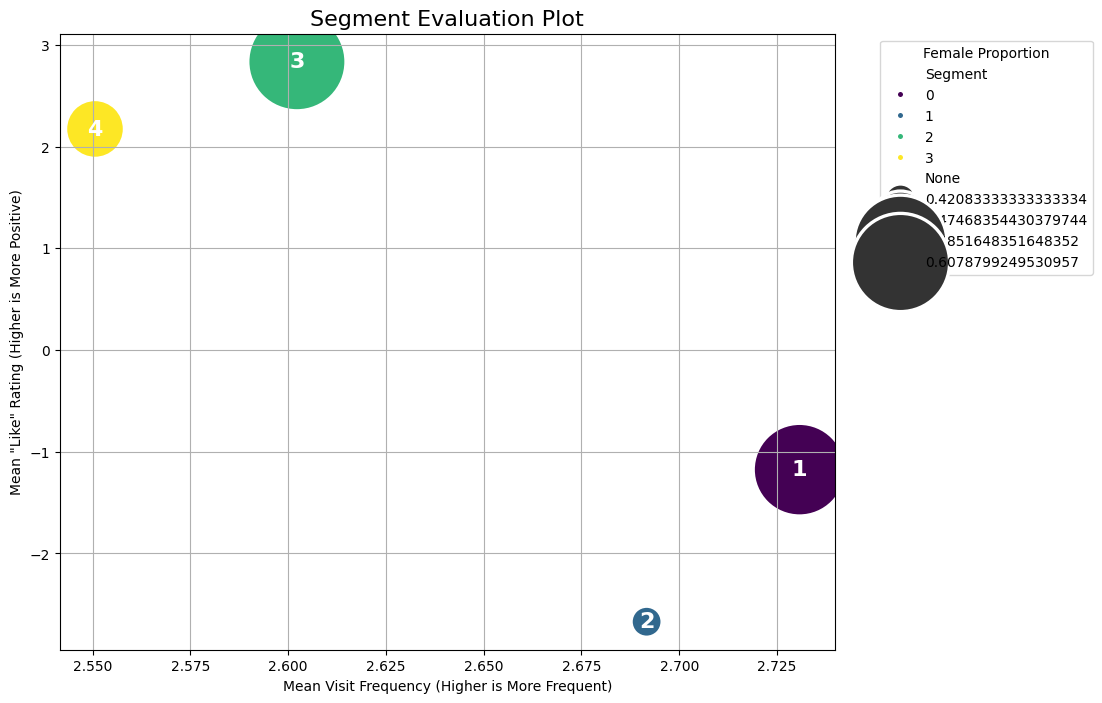

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean values for each segment to use as plot coordinates and bubble size
visit_freq_means = mcdonalds.groupby('Segment')['VisitFrequency.n'].mean()
like_means = mcdonalds.groupby('Segment')['Like.n'].mean()
female_prop = mcdonalds[mcdonalds['Gender'] == 'Female'].groupby('Segment').size() / mcdonalds.groupby('Segment').size()

# Create the bubble chart (Segment Evaluation Plot)
plt.figure(figsize=(10, 8))
bubble_plot = sns.scatterplot(x=visit_freq_means,
                              y=like_means,
                              size=female_prop,
                              sizes=(500, 5000), # Controls min/max bubble size
                              hue=visit_freq_means.index,
                              palette='viridis',
                              legend=True)

# Add labels to the bubbles
for i in range(len(visit_freq_means)):
    plt.text(visit_freq_means[i], like_means[i], str(i + 1), # Label as 1,2,3,4
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=16, color='white', weight='bold')

plt.title('Segment Evaluation Plot', fontsize=16)
plt.xlabel('Mean Visit Frequency (Higher is More Frequent)')
plt.ylabel('Mean "Like" Rating (Higher is More Positive)')
plt.legend(title='Female Proportion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()